# Plastic Bottle Classification With DenseNet201

---





## Dataset Preparation

In [ ]:
clear all

### 1. Menyambungkan drive colab dengan drive google



In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


### 2. Mendefinisikan folder yang digunakan

In [ ]:
base_dir = '/content/drive/My Drive/plasticproject/datasets2'
!ls "/content/drive/My Drive/plasticproject/datasets2"

train  val


### 3. Definisi dataset yang digunakan (Train, Validation, dan Test)

In [ ]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'val')
testing_dir = os.path.join(base_dir,'val')

In [ ]:
HDPE_train_dir = os.path.join(train_dir,'HDPE')
PET_train_dir = os.path.join(train_dir,'PET')
print("Jumlah Data Train Tiap Kelas")
print('jumlah gambar train PET :', len(os.listdir(PET_train_dir)))
print('jumlah gambar train HDPE :', len(os.listdir(HDPE_train_dir)))

Jumlah Data Train Tiap Kelas
jumlah gambar train PET : 734
jumlah gambar train HDPE : 824


In [ ]:
HDPE_validation_dir = os.path.join(validation_dir,'HDPE')
PET_validation_dir = os.path.join(validation_dir,'PET')
print("Jumlah Data Validasi Tiap Kelas")
print('jumlah gambar validasi PET :', len(os.listdir(PET_validation_dir)))
print('jumlah gambar validasi HDPE :', len(os.listdir(HDPE_validation_dir)))

Jumlah Data Validasi Tiap Kelas
jumlah gambar validasi PET : 315
jumlah gambar validasi HDPE : 354


In [ ]:
HDPE_test_dir = os.path.join(testing_dir,'HDPE')
PET_test_dir = os.path.join(testing_dir,'PET')
print("Jumlah Data tes Tiap Kelas")
print('jumlah gambar test PET :', len(os.listdir(PET_validation_dir)))
print('jumlah gambar test HDPE :', len(os.listdir(HDPE_validation_dir)))

Jumlah Data tes Tiap Kelas
jumlah gambar test PET : 315
jumlah gambar test HDPE : 354


## Pre-Processing

### 1. Data Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'nearest',
                  width_shift_range = 0.1,
                  height_shift_range = 0.3,
                  zoom_range = 0.4
)

val_datagen = ImageDataGenerator(
                  rotation_range = 65,
                  horizontal_flip = True,
                  vertical_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'nearest',
                  width_shift_range = 0.1,
                  height_shift_range = 0.3,
                  zoom_range = 0.4
)

test_datagen = ImageDataGenerator(
                  rotation_range = 15,
                  horizontal_flip = True,
                  vertical_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'nearest',
                  width_shift_range = 0.1,
                  height_shift_range = 0.3,
                  zoom_range = 0.4
)

### 2. Menentukan target

In [ ]:
# target

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size = (224, 224),
    batch_size = 32,
    shuffle=False,
    class_mode = 'categorical'
)
train_generator.class_indices

Found 1558 images belonging to 2 classes.
Found 669 images belonging to 2 classes.
Found 669 images belonging to 2 classes.


{'HDPE': 0, 'PET': 1}

### 3. Plot perbandingan jumlah dataset untuk train

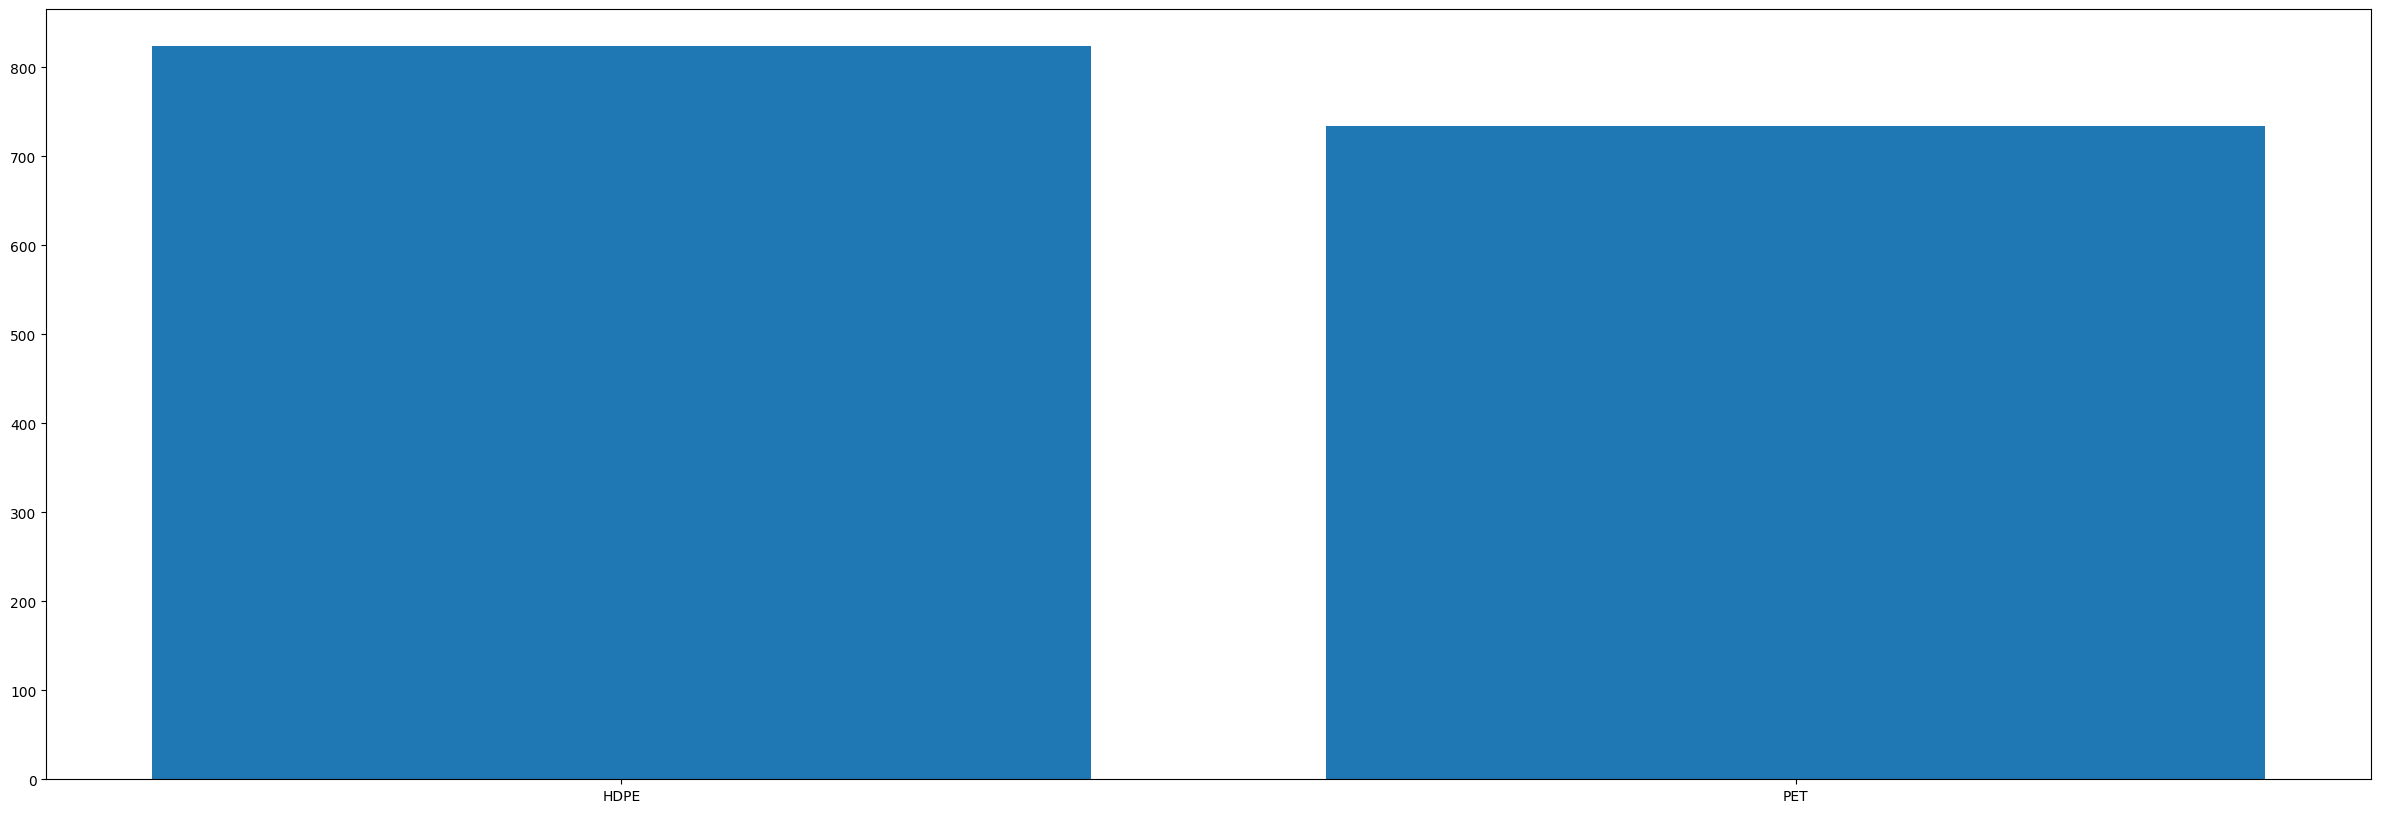

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
cls_train = train_generator.classes
from collections import OrderedDict
classes = list(train_generator.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_train, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(2):
    num_values.append(valdict[i])
plt.figure(figsize=(30,10))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values)
plt.xticks(x, xlabel)
plt.show()

## Model DenseNet201

### 1. Definisi Model DenseNet201

In [ ]:

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout


In [ ]:
model_DenseNet201 = tf.keras.applications.DenseNet201(input_shape=(224,224,3), include_top = False, weights = 'imagenet', pooling = 'max')
for layer in model_DenseNet201.layers:
  layer.trainable = False
model = Sequential()
model.add(model_DenseNet201)
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation = "softmax", name="classification"))

74836368/74836368 [==============================] - 4s 0us/step


### 2. Menambahkan definisi loss, optimizer, dan metrics pada model

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate=0.00001),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 classification (Dense)      (None, 2)                 258       
                                                                 
Total params: 18,846,914
Trainable params: 524,930
Non-t

### 3. Menambahkan Callbacks dengan fungsi ModelCheckpoint untuk menyimpan model, dan CSVLogger untuk menyimpan plot hasil training

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
filepath =  '/content/drive/My Drive/plasticproject/PlasticBottle_model_DenseNet201_3New_datasets2.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,
                             save_best_only=False, mode='min')
csv_logger = CSVLogger('/content/drive/My Drive/plasticproject/log_DenseNet201_3New_datasets2.csv', append=True)
callbacks_list = [csv_logger, checkpoint]

### 4. Training

In [ ]:
# model training
history = model.fit(
            train_generator,
            steps_per_epoch = 48 ,
            epochs = 50,
            validation_data = val_generator,
            validation_steps = 20,
            verbose=1,
            callbacks=callbacks_list
)

# print(result)
print(history.history.keys())
print((history.history.values()))

Epoch 1/50
48/48 [==============================] - ETA: 0s - loss: 4.6855 - accuracy: 0.5459
Epoch 1: saving model to /content/drive/My Drive/plasticproject/PlasticBottle_model_DenseNet201_3New_datasets2.h5
48/48 [==============================] - 508s 10s/step - loss: 4.6855 - accuracy: 0.5459 - val_loss: 0.7856 - val_accuracy: 0.7578
Epoch 2/50
48/48 [==============================] - ETA: 0s - loss: 2.2951 - accuracy: 0.6625
Epoch 2: saving model to /content/drive/My Drive/plasticproject/PlasticBottle_model_DenseNet201_3New_datasets2.h5
48/48 [==============================] - 30s 638ms/step - loss: 2.2951 - accuracy: 0.6625 - val_loss: 0.4420 - val_accuracy: 0.8875
Epoch 3/50
48/48 [==============================] - ETA: 0s - loss: 1.8534 - accuracy: 0.7110
Epoch 3: saving model to /content/drive/My Drive/plasticproject/PlasticBottle_model_DenseNet201_3New_datasets2.h5
48/48 [==============================] - 31s 644ms/step - loss: 1.8534 - accuracy: 0.7110 - val_loss: 0.3282 - va

## Post-Training

### 1. Menampilkan grafik akurasi dan loss

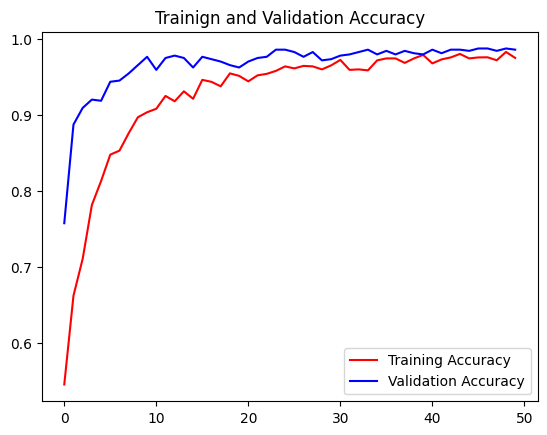

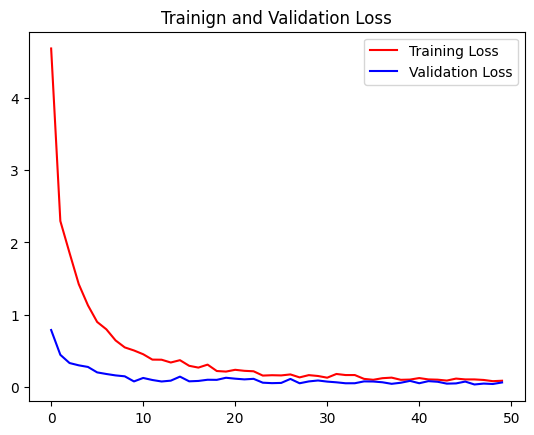

In [ ]:
# grafik akurasi

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Trainign and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Trainign and Validation Loss')
plt.legend(loc = 'best')
plt.show()

### 2. Menampilkan Confusion Matrix

<ipython-input-17-bca821d8af46>:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

        HDPE       0.99      0.98      0.98       354
         PET       0.98      0.98      0.98       315

    accuracy                           0.98       669
   macro avg       0.98      0.98      0.98       669
weighted avg       0.98      0.98      0.98       669



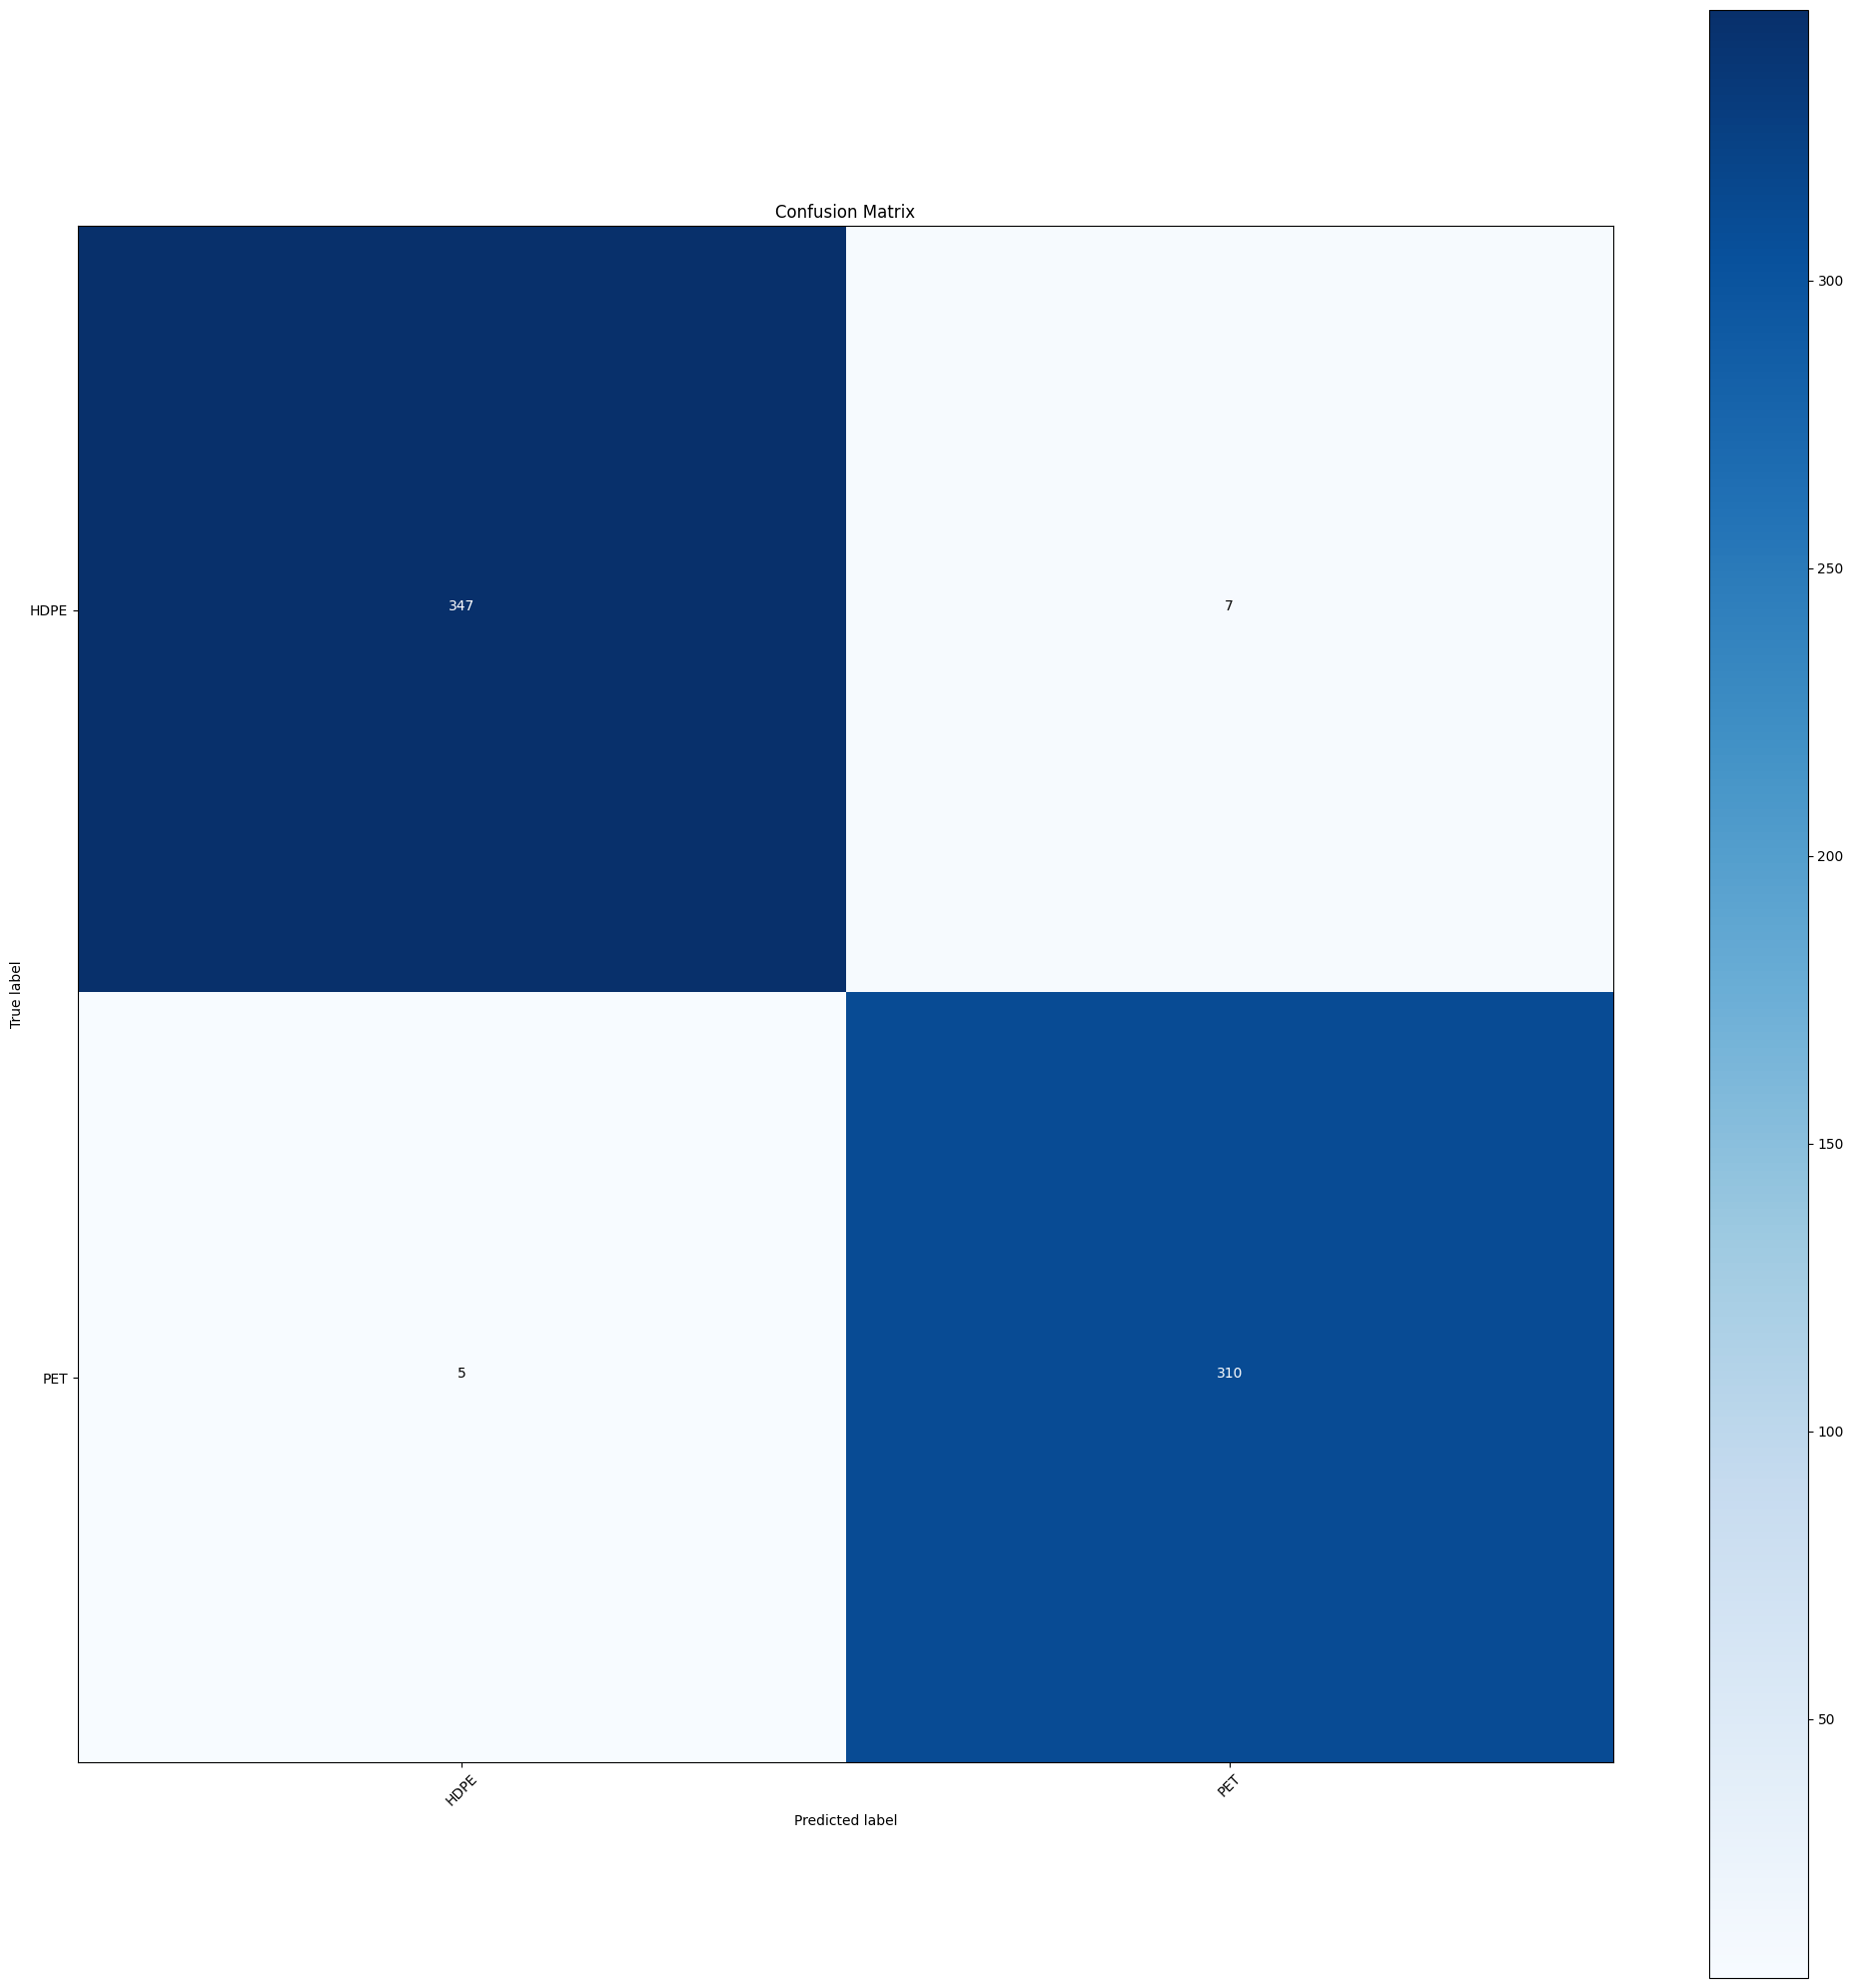

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#shuffle=False

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))